<a href="https://colab.research.google.com/github/cardboard828/soukan_2025/blob/main/II_(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git remote add origin https://github.com/cardboard828/soukan_2025.git

fatal: not a git repository (or any of the parent directories): .git


In [3]:
!pip install qiskit
!pip install qiskit[visualization]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=9ba2d0cdb289c40ffd06494be39f3210496e9d9f39740596b02bb7c3af03fa69
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [4]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 104.7 MB/s eta 0:00:00


In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate, QFT
import numpy as np
from qiskit.quantum_info import Statevector
import scipy
from scipy.stats import unitary_group
import matplotlib.pyplot as plt
import math
from scipy.linalg import expm  # ← これが必要！
from qiskit.circuit.library import RGate

$N>\sim (\omega t)^2/\varepsilon$

thetaは$\omega t$に対応, 下の誤差が$\varepsilon$に対応、$N\sim 100$を超えてくると誤差が出てくる気がする（ちゃんと評価はしていないがnp.piなどは近似値でしかない）

In [39]:
theta = 3 # 任意の角度
n = np.array([1, 1, 0]) / np.sqrt(2)

In [40]:
N = 100 # 分割数（繰り返し回数）

In [34]:
phi = np.arctan2(n[1], n[0])  # φ
# phi = np.pi/4

RGateはxy平面phiの角度の軸周りにtheta回転させるゲートを表す（はず）。技術的な問題で、過去問ではX, Zを使っていたがここではX, Yを使うことにする。

In [41]:
qc = QuantumCircuit(1, 1)
qc.append(RGate(theta, phi), [0])
for i in range(N):
    qc.ry(-theta / N, 0)
    qc.rx(-theta / N, 0)

qc.measure(0, 0)
# qc.draw("mpl")

In [43]:
simulator = AerSimulator()
qct = transpile(qc, simulator)

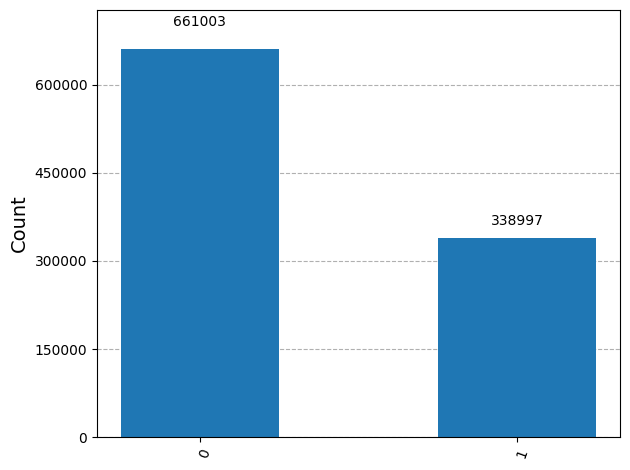

誤差= 0.6115212016926221


In [44]:
shots=1000000
job=AerSimulator().run(qct, shots=1000000).result()
statistics=job.get_counts()
display(plot_histogram(statistics))
gosa=math.sqrt(2*(1-math.sqrt(statistics['0']/shots)))
print("誤差=",gosa)